Ecrire une fonction python qui retourne le coût global qui prend comme argument le coût variable, le coût unitaire et le nombre de produit.
Tracer la courbe du graphique de la fonction de coût global pour plusieurs valeur de chacun des paramètres en fixant les autres.


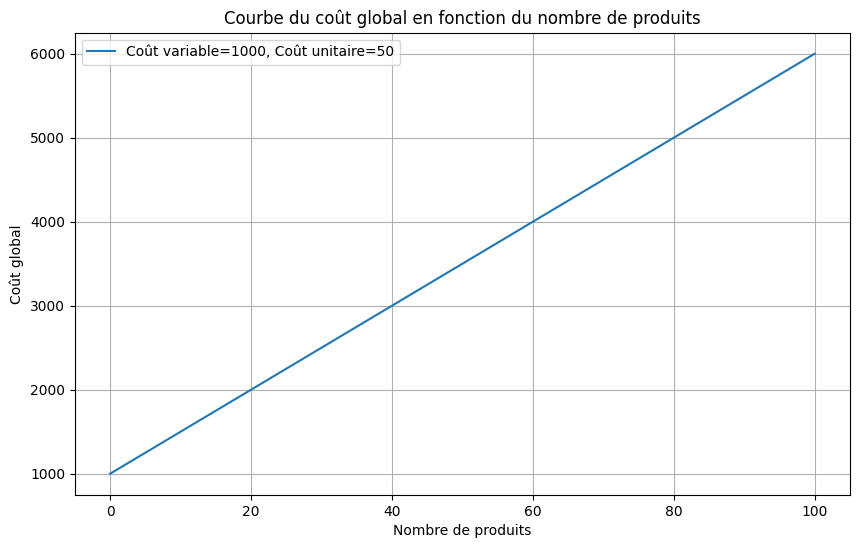

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def cout_global(cout_variable, cout_unitaire, nombre_produit):
    return cout_variable + (cout_unitaire * nombre_produit)

# Paramètres fixes
cout_variable = 1000
cout_unitaire = 50

# Différentes valeurs pour le nombre de produits
nombre_produit = np.linspace(0, 100, 200)

# Calcul du coût global pour chaque valeur de nombre_produit
couts = cout_global(cout_variable, cout_unitaire, nombre_produit)

# Tracé du graphique
plt.figure(figsize=(10, 6))
plt.plot(nombre_produit, couts, label=f'Coût variable={cout_variable}, Coût unitaire={cout_unitaire}')
plt.xlabel('Nombre de produits')
plt.ylabel('Coût global')
plt.title('Courbe du coût global en fonction du nombre de produits')
plt.legend()
plt.grid(True)
plt.show()

Trouver la fonction numpy qui permet de faire le produit d’une matrice et un vecteur.
Est-ce que la multiplication fonctionne dans les 2 sens ? Pourquoi ?
Trouver la fonction qui permet de trouver l’inverse d’une matrice dans numpy
Ecrire un script python qui permet d’obtenir le nombre d’unité x arrondi à la moyenne inférieur et la quantité de matière première y arrondi supérieur à 2 chiffres après la virgule

In [18]:
import numpy as np

# Exemple de matrice et vecteur
A = np.array([[10, 5], [-4, 1]])
b = np.array([[9000], [50]])

# Produit matrice-vecteur
produit = np.dot(A, b)
print(produit)

# Inverse de la matrice
inverse_A = np.linalg.inv(A)
print(inverse_A)

u = np.linalg.inv(A) @ b

u_rounded = np.round(u, 2)

print(u_rounded)

[[ 90250]
 [-35950]]
[[ 0.03333333 -0.16666667]
 [ 0.13333333  0.33333333]]
[[ 291.67]
 [1216.67]]


Générer des problèmes aléatoirement
Implémenter un algorithme python qui détermine si le équations ont une solution ou non, si oui donner la solution.
Travailler sur la modularité dans le code et manipuler les concepts

In [4]:
import numpy as np

def generate_random_problem(size):
    A = np.random.randint(-10, 10, (size, size))
    b = np.random.randint(-10, 10, size)
    return A, b

def is_invertible(A):
    return np.linalg.det(A) != 0

def solve_equation(A, b):
    if is_invertible(A):
        solution = np.linalg.solve(A, b)
        return solution
    else:
        return None

# Generate a random problem
size = 2
A, b = generate_random_problem(size)
print("Matrix A:")
print(A)
print("Vector b:")
print(b)

# Check if the system has a solution and solve it
solution = solve_equation(A, b)
if solution is not None:
    print("The system has a solution:")
    print(solution)
else:
    print("The system does not have a solution.")

# Compter le nombre de fois où le système est réversible sur 1000 problèmes
nb_invertible = 0
for _ in range(1000):
    A_random, b_random = generate_random_problem(size)
    if is_invertible(A_random):
        nb_invertible += 1

percentage_invertible = (nb_invertible / 1000) * 100
print(f"Nombre de systèmes réversibles sur 1000 problèmes: {nb_invertible} ({percentage_invertible:.2f}%)")






Matrix A:
[[-10   0]
 [-10   0]]
Vector b:
[-2  7]
The system does not have a solution.
Nombre de systèmes réversibles sur 1000 problèmes: 976 (97.60%)


Un système d'équations linéaires est indéterminé lorsqu'il possède une infinité de solutions. Cela se produit généralement lorsque les équations du système sont dépendantes, c'est-à-dire qu'elles ne fournissent pas suffisamment d'informations pour déterminer une solution unique. Mathématiquement, cela se traduit par un rang de la matrice des coefficients inférieur au nombre d'inconnues.

Un système est incompatible lorsqu'il n'a pas de solution. Cela se produit lorsque les équations du système se contredisent, c'est-à-dire qu'il n'existe aucune combinaison de valeurs pour les inconnues qui satisfasse toutes les équations simultanément. Mathématiquement, cela se traduit par un rang de la matrice augmentée (matrice des coefficients avec le vecteur des constantes ajouté comme colonne supplémentaire) supérieur au rang de la matrice des coefficients.

A = np.array([
    [1, 2, -1, 1, 1],
    [2, -1, 3, -1, 4],
    [-1, 3, 2, 1, -1],
    [3, -1, 1, 2, 3],
    [2, 1, -3, 3, 1]
])

# Constant vector Y
Y = np.array([8, 15, 7, 20, 5])

Ecrire les tableaux numpy correspondant au problèmes en explicitant X A et Y
Est-ce que ce système possède une solution ?
Résoudre l’équation



In [5]:
import numpy as np

# Coefficient matrix A
A = np.array([
    [1, 2, -1, 1, 1],
    [2, -1, 3, -1, 4],
    [-1, 3, 2, 1, -1],
    [3, -1, 1, 2, 3],
    [2, 1, -3, 3, 1]
])

# Constant vector Y
Y = np.array([8, 15, 7, 20, 5])

# Check if the system has a solution
rank_A = np.linalg.matrix_rank(A)
rank_A_augmented = np.linalg.matrix_rank(np.c_[A, Y])

if rank_A == rank_A_augmented:
    if rank_A == A.shape[1]:
        solution = np.linalg.solve(A, Y)
        print("The system has a unique solution:")
        print(solution)
    else:
        print("The system has infinitely many solutions.")
else:
    print("The system has no solution.")


The system has a unique solution:
[17.13333333  3.64444444  4.42222222 -3.82222222 -8.17777778]


Le Simplexe

Contexte : 
Vous gérez une usine qui produit deux types de produits : A et B. 
Pour fabriquer chaque unité de produit A, il faut 1 heure de travail sur la machine X et 3 heures sur la machine Y. 
Chaque unité de produit B nécessite 2 heures de travail sur la machine X et 1 heure sur la machine Y. 
La machine X est disponible 16 heures par jour, et la machine Y est disponible 24 heures par jour. 
Le profit réalisé par la vente d'une unité de produit A est de 30€, tandis que celui d'une unité de produit B est de 20€.
Objectif : Maximiser le profit quotidien de l'usine.
Votre tâche consiste à déterminer le nombre d'unités de chaque produit (A et B) à produire chaque jour pour maximiser le profit total de l'usine, tout en respectant les contraintes de capacité des machines



dérive quantification d'un moment a côté d'une position

SIMPLEXE

In [20]:
# Importation des bibliothèques nécessaires
from scipy.optimize import linprog

# Coefficients de la fonction objectif (à maximiser, donc - pour minimisation)
# Z = 30x1 + 20x2, on minimise -Z
c = [-30, -20]  # Coefficients pour x1 et x2

# Contraintes d'inégalité sous la forme Ax <= b
A = [
    [1, 2],  # Contraintes pour la machine X
    [3, 1]   # Contraintes pour la machine Y
]
b = [16, 24]  # Capacités des machines X et Y

# Bornes des variables (x1, x2 >= 0)
x_bounds = (0, None)  # x1 >= 0
y_bounds = (0, None)  # x2 >= 0

# Résolution du problème avec linprog
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method='highs')

# Affichage des résultats
if result.success:
    print("Résultat optimal trouvé :")
    print(f"Nombre d'unités de produit A (x1) : {result.x[0]:.2f}")
    print(f"Nombre d'unités de produit B (x2) : {result.x[1]:.2f}")
    print(f"Profit maximal : {-result.fun:.2f} €")
else:
    print("La résolution n'a pas abouti.")


Résultat optimal trouvé :
Nombre d'unités de produit A (x1) : 6.40
Nombre d'unités de produit B (x2) : 4.80
Profit maximal : 288.00 €
